<a href="https://colab.research.google.com/github/farsim-hossain/python-projects/blob/main/Basic_Image_Cassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Using TF

This is a practice project. We will use Fashion Mnist data for this. We will use tf.keras API for training models in tf.

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


## Importing the Fashion Mnist Dataset

The dataset contains 70000 grayscale images in 10 categories. We will use 60000 images to train and 10000 images to test the model.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images,test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


We have a total of 10 labels like T-shirt, Trouser etc.

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']


## Data exploration

There are 60000 images with 28X28 pixels.

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
train_labels.shape

(60000,)

In [11]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

### In abov codes, we were trying to noodle with what the dataset looks like.


## Preprocess the data
The pixel values fall between 0 to 255. We will plot the data to check how it looks like in matplotlib

<function matplotlib.pyplot.show>

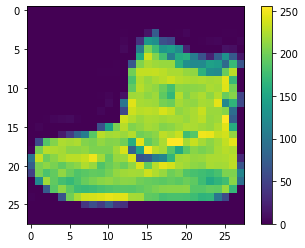

In [14]:
plt.figure()
plt.imshow(train_images[0]) # the first row
plt.colorbar()
plt.grid(False)
plt.show

This is a good time to mention that to process the image data, the images need to be processed to be presented in pixels. We got the processed pixel values already but in real life, the pictures must be turned into dataets before we procedd towards modeling.

##Scaling the data. We need to feed the data to Neural Network and before that we have to scale them.

In [15]:
train_images = train_images/255.0
test_images = test_images/255.0


We will now display the first 10 arrays and display their **class names**.

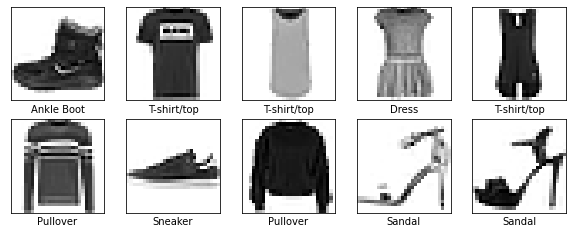

In [18]:
plt.figure(figsize= (10,10))

for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

## Building The Model
Building the network requires configuring the layers of the model and then compiling the model. 

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully these representations are meaningful for the problem in hand.

Deep learning consisting chaining together simple layers. Most layers have parameteres that are learned during training.

In [21]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation= 'relu'),
                             tf.keras.layers.Dense(25)
])

## Some more settings
We need to add some more stuffs to the layer. :)


In [22]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

## Train the model

In [23]:
model.fit(train_images,train_labels,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6581 - accuracy: 0.7772
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3882 - accuracy: 0.8617
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3400 - accuracy: 0.8752
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3178 - accuracy: 0.8838
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2800 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2726 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2587 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2530 - accuracy: 0.9056
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

## Evaluate accuracy


In [24]:
test_loss , test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy:',test_acc)

313/313 - 0s - loss: 0.3478 - accuracy: 0.8778

Test Accuracy: 0.8777999877929688


Why we got less accuracy on test set ? This means that our model had the overfitting problem. Lets try a regularizer .



In [29]:
model2 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation= 'relu'),
                             tf.keras.layers.Dense(25,kernel_regularizer='l2')

                            
])

model2.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

model2.fit(train_images,train_labels,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8427 - accuracy: 0.7703
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4821 - accuracy: 0.8506
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4261 - accuracy: 0.8675
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4043 - accuracy: 0.8687
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3762 - accuracy: 0.8777
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3602 - accuracy: 0.8830
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3462 - accuracy: 0.8873
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3350 - accuracy: 0.8910
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3285 - accuracy: 0.8937
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.320

In [30]:
test_loss , test_acc = model2.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy:',test_acc)

313/313 - 0s - loss: 0.3852 - accuracy: 0.8756

Test Accuracy: 0.8755999803543091


## Make Predictions

Our model ouputs as "LOGITS". We need to convert Logits into probablities. 

In [31]:
probability_model = tf.keras.Sequential([model2,
                                         tf.keras.layers.Softmax()])

In [32]:
predictions = probability_model.predict(test_images)

The model predicted images in the test set. As the test set is represented as arrays, lets check what the model predicts for the first array.

In [33]:
predictions[0]

array([3.6504521e-04, 2.3741479e-04, 1.5066944e-04, 1.9146841e-04,
       7.9338402e-05, 7.4001729e-02, 3.8165803e-04, 1.9815725e-01,
       7.8828875e-03, 7.1853405e-01, 1.5469382e-06, 1.0145368e-06,
       1.5587306e-06, 1.1459681e-06, 1.1951555e-06, 1.2016127e-06,
       8.3306657e-07, 9.3135895e-07, 1.3418106e-06, 6.7299663e-07,
       1.4855351e-06, 1.7897216e-06, 1.3259731e-06, 1.5201764e-06,
       8.5102010e-07], dtype=float32)

A prediction represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [34]:
np.argmax(predictions[0])

9

So the model is confident that the first array in the test set is an ankle boot.

Lets Graph this to look at the full set if 10 class predictions.

In [35]:
def plot_image(i,predictions_array, true_label,img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Predictions 
Lets make predictions on the 0th image. Correct prediction labels are blue and incorrects are red.

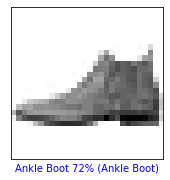

In [43]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
#plt.subplot(1,2,2)
#plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [44]:
#another prediction

img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimied to make predictions on a batch. ccordingly, even though we are making predictions on a single image, we have to follow the rules: add it to a list.

In [45]:
img = (np.expand_dims(img,0))

img.shape

(1, 28, 28)

In [46]:
prediction_single = probability_model.predict(img)

print(prediction_single)

[[2.7142998e-04 6.1241667e-07 9.3184197e-01 1.0582444e-05 4.5995057e-02
  1.3308056e-06 2.1864273e-02 6.0775541e-08 1.4324205e-05 1.6959649e-07
  1.8004767e-08 1.1906282e-08 1.8139373e-08 1.3449038e-08 1.4010256e-08
  1.4083776e-08 9.7862403e-09 1.0928841e-08 1.5674381e-08 7.8847764e-09
  1.7304252e-08 2.0777703e-08 1.5495168e-08 1.7699175e-08 9.9945714e-09]]


In [47]:
np.argmax(prediction_single[0])

2

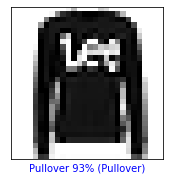

In [49]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
#plt.subplot(1,2,2)
#plot_value_array(i, predictions[i],  test_labels)
plt.show()

The model predicts the image as **2 = Pullover**